# Doug's Homework (Master Copy)
----

### Analysis (Example)
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

### Doug's Analysis
* During this time of year, it appears a majority of all northern hemisphere cities witin the 0 Deg. to 40 Deg. latitude are greater than or equal to 60 degrees F.  This supports the idea the northern hemisphere gets warmer during the months between May and August.
* Appears we have bad data for the city of Paita, Peru as the current chart shows a humidity of near 300%.  Otherwise, the northern cities near the equator tend to have a slightly higher humidity than their counter parts in the south during this time frame.
* It appears we have 5 major groupings when we look at the percentage of cloud cover for the cities when we compare their geographical location.  Most cities fall into the 100%, 75%, 40%, 20%, or around 0%.  It appears maybe the weather patterns might run north/south instead of east/west.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [58]:
# List for holding lat_lngs and cities
Coordinates = []
cities = []

# Create a set of random lat and lng combinations
RandomLat = np.random.uniform(low=-90.000, high=90.000, size=1500)
RandomLong = np.random.uniform(low=-180.000, high=180.000, size=1500)

# zip coordinates into list
Coordinates = zip(RandomLat, RandomLong)

# Identify nearest city for each lat, lng combination
for lat_lng in Coordinates:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)


# **** Testing ****
# CityList= pd.DataFrame (cities)
# CityListTest= pd.DataFrame({"city": cities})
# CityList = CityListTest.head()

# CityList.head()

613
['lorengau', 'busselton', 'karoi', 'east london', 'aflu', 'gemena', 'ribeira grande', 'butaritari', 'kebemer', 'punta arenas', 'krasnokamensk', 'qaanaaq', 'aklavik', 'hanzhong', 'waddan', 'murgab', 'taolanaro', 'jamestown', 'ozgon', 'tsihombe', 'gravdal', 'opuwo', 'astana', 'mataura', 'provideniya', 'cap malheureux', 'port alfred', 'kaeo', 'tuktoyaktuk', 'tokamachi', 'katsuura', 'hithadhoo', 'monrovia', 'rock sound', 'georgetown', 'half moon bay', 'ushuaia', 'dikson', 'new norfolk', 'klaksvik', 'san patricio', 'albany', 'pangnirtung', 'bluff', 'chuy', 'lebu', 'ubauro', 'sentyabrskiy', 'hilo', 'beloha', 'kiunga', 'dire dawa', 'maua', 'alyangula', 'rikitea', 'east wenatchee bench', 'brigantine', 'arraial do cabo', 'attawapiskat', 'guerrero', 'chokurdakh', 'mahibadhoo', 'duldurga', 'te anau', 'iqaluit', 'curup', 'kapaa', 'vila franca do campo', 'hasaki', 'port elizabeth', 'tuatapere', 'pochutla', 'atuona', 'pitimbu', 'vaitupu', 'ixtapa', 'vaini', 'kodiak', 'lompoc', 'grand river south

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
# Setup blank list to capture weather information for each city
WeatherInformation=[]    

#Sets the api url and desired information type
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Builds a partial query URL
# query_url = f"{url}appid={api_key}&units={units}&q="
#  appid=f39d363c496b1f9ee88572579d209319
# was not able to pass in API Key using appid
query_url = f"{url}appid=f39d363c496b1f9ee88572579d209319&units={units}&q="
    
#Create and establish city and error counter for looping
CityCounter = 0
ErrorCounter = 0

#Loops through every city and saves response information from API to variables which write to new dictionary
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        MaxTemp=response["main"]["temp_max"]
        Humidity=response["main"]["humidity"]
        CloudCoverage=response["clouds"]["all"]
        WindSpeed=response["wind"]["speed"]
        CityLatitude=response["coord"]["lat"]
        CityLongitude=response["coord"]["lon"]
        CityName=response["name"]
        CityID=response["id"]
        CityCountry=response["sys"]["country"]
        WeatherInformation.append({
                                    "City": CityName, 
                                    "Country": CityCountry, 
                                    "Latitude": CityLatitude,
                                    "Longitude": CityLongitude,
                                    "Max Temperature (F)": MaxTemp, 
                                    "Humidity (%)": Humidity, 
                                    "Cloudiness (%)":CloudCoverage, 
                                    "Wind Speed (MPH)": WindSpeed,
                                    "City ID": CityID
                                })
        CityCounter += 1
        print(f"({CityCounter}): {city}")
    except KeyError:
        #Creates and prints the error number alongside its associated city
        ErrorCounter += 1
        print(f"ERROR {ErrorCounter}: {city}")


#Prints a summary of the for-loop
print("---------------------------------------")
print(f"{CityCounter} cities successfully logged")
print(f"{ErrorCounter} errors returned")

(1): lorengau
(2): busselton
(3): karoi
(4): east london
ERROR 1: aflu
(5): gemena
(6): ribeira grande
(7): butaritari
ERROR 2: kebemer
(8): punta arenas
(9): krasnokamensk
(10): qaanaaq
(11): aklavik
(12): hanzhong
(13): waddan
(14): murgab
ERROR 3: taolanaro
(15): jamestown
ERROR 4: ozgon
ERROR 5: tsihombe
(16): gravdal
(17): opuwo
(18): astana
(19): mataura
(20): provideniya
(21): cap malheureux
(22): port alfred
(23): kaeo
(24): tuktoyaktuk
(25): tokamachi
(26): katsuura
(27): hithadhoo
(28): monrovia
(29): rock sound
(30): georgetown
(31): half moon bay
(32): ushuaia
(33): dikson
(34): new norfolk
(35): klaksvik
(36): san patricio
(37): albany
(38): pangnirtung
(39): bluff
(40): chuy
(41): lebu
(42): ubauro
ERROR 6: sentyabrskiy
(43): hilo
(44): beloha
(45): kiunga
(46): dire dawa
(47): maua
(48): alyangula
(49): rikitea
(50): east wenatchee bench
(51): brigantine
(52): arraial do cabo
ERROR 7: attawapiskat
(53): guerrero
(54): chokurdakh
(55): mahibadhoo
(56): duldurga
(57): te a

(440): leningradskiy
(441): acapulco
(442): ust-nera
(443): yar-sale
(444): bagheria
(445): gaziantep
ERROR 58: kadykchan
(446): reconquista
(447): tilichiki
(448): araouane
ERROR 59: paradwip
(449): bollnas
(450): mezen
(451): santa rosalia
(452): dingle
(453): wajir
(454): xuddur
(455): emba
(456): mizdah
(457): slavutych
(458): amurzet
(459): hay river
(460): hamilton
(461): launceston
(462): gisborne
(463): ardakan
(464): flinders
(465): alice springs
(466): puerto penasco
ERROR 60: louisbourg
(467): jining
(468): ucluelet
(469): tevaitoa
ERROR 61: kushmurun
(470): belaya gora
(471): puerto suarez
(472): bilma
(473): kalanguy
(474): vereshchagino
(475): illela
(476): medicine hat
(477): djambala
(478): vicksburg
(479): dondo
(480): merrill
(481): coquimbo
(482): mana
(483): forio
(484): san pedro
(485): anjozorobe
(486): bilibino
(487): freeport
(488): moyale
(489): mantena
(490): ulaangom
(491): paralia
(492): khasan
(493): calderitas
(494): skjervoy
(495): chingola
(496): saskyla

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
# Create weather dataframe out of information captured from API call
WeatherDataFrame = pd.DataFrame(WeatherInformation)

# Display weather data
WeatherDataFrame.head()

,City,City ID,Cloudiness (%),Country,Humidity (%),Latitude,Longitude,Max Temperature (F),Wind Speed (MPH)
0,Lorengau,2092164,100,PG,86,-2.02,147.27,79.07,2.42
1,Busselton,2075265,0,AU,69,-33.64,115.35,48.00,19.08
2,Karoi,889191,1,ZW,64,-16.82,29.68,58.01,4.76
3,East London,1006984,100,ZA,90,-33.02,27.91,58.01,5.23
4,Gemena,2315728,68,CD,96,3.25,19.78,70.97,2.86


In [76]:
#Export the city data into a .csv.
WeatherDataFrame.to_csv("WeatherData_Homework_pdf.csv", index=False, header=True)

#Display the DataFrame
WeatherDataFrame.head()


# WeatherDataFrameHumdity = WeatherDataFrame.sort_values(["Humidity (%)"], ascending=False)
# WeatherDataFrameHumdity.head()

,City,City ID,Cloudiness (%),Country,Humidity (%),Latitude,Longitude,Max Temperature (F),Wind Speed (MPH)
249,Paita,3694112,0,PE,290,-5.09,-81.11,62.60,18.34
47,Alyangula,2079582,26,AU,100,-13.85,136.42,64.40,1.12
513,Casper,5820705,90,US,100,42.87,-106.31,53.01,10.29
498,Loandjili,2258378,20,CG,100,-4.77,11.87,75.20,3.36
141,Torbay,6167817,90,CA,100,47.66,-52.73,39.99,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

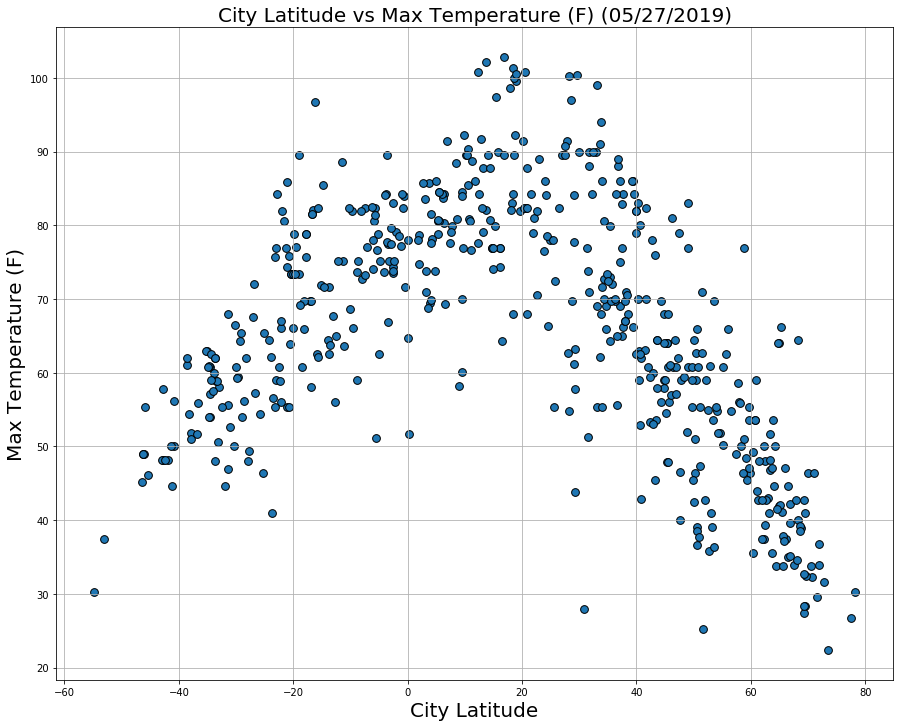

In [69]:
WeatherDataFrame.plot(kind='scatter', x='Latitude', y='Max Temperature (F)', marker="o", s=60, color="#1f77b4", edgecolor='black', alpha=1, figsize=(15,12))
cur_date = pd.datetime.now().strftime("%m/%d/%Y")

plt.grid()
plt.title(F"City Latitude vs Max Temperature (F) ({cur_date})", fontsize=20)
plt.xlabel('City Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=20)
plt.savefig('CityLat_MaxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

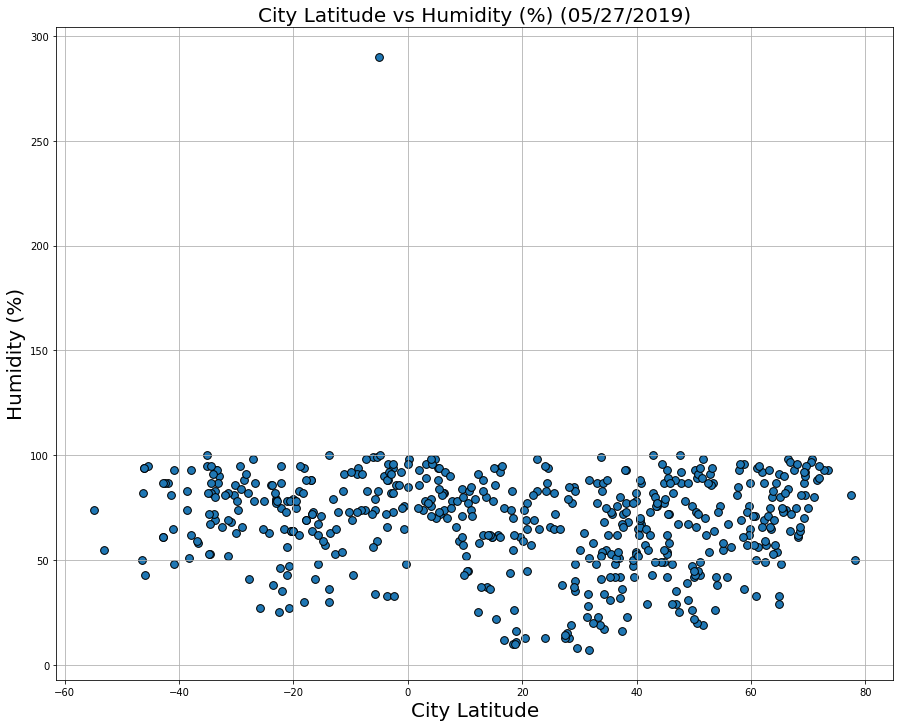

In [70]:
WeatherDataFrame.plot(kind='scatter', x='Latitude', y='Humidity (%)', marker="o", s=60, color="#1f77b4", edgecolor='black', alpha=1, figsize=(15,12))
cur_date = pd.datetime.now().strftime("%m/%d/%Y")

plt.grid()
plt.title(F"City Latitude vs Humidity (%) ({cur_date})", fontsize=20)
plt.xlabel('City Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=20)
plt.savefig('CityLat_Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

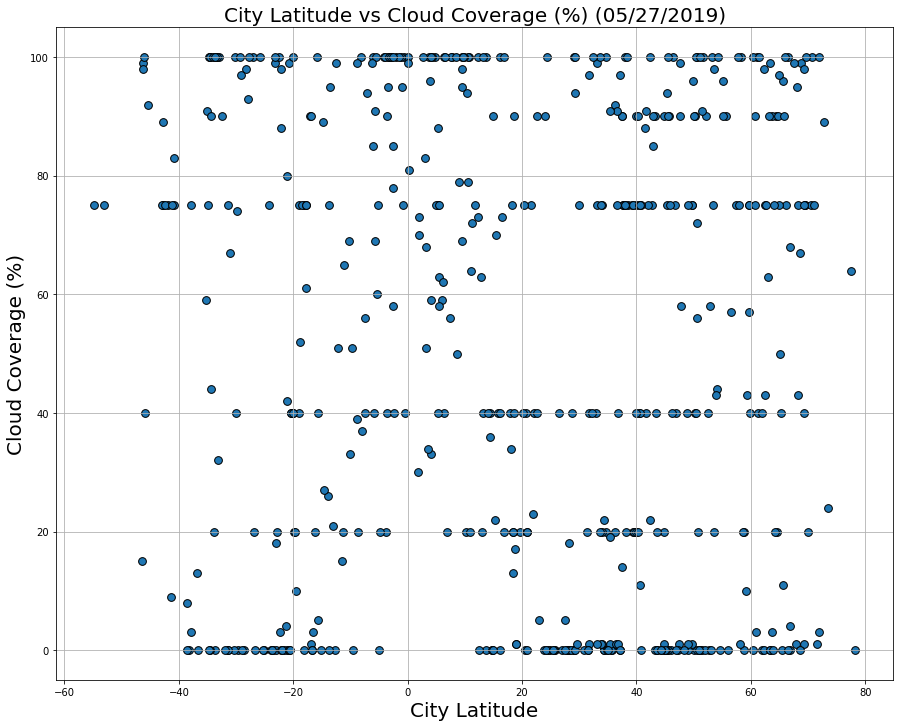

In [71]:
WeatherDataFrame.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', marker="o", s=60, color="#1f77b4", edgecolor='black', alpha=1, figsize=(15,12))
cur_date = pd.datetime.now().strftime("%m/%d/%Y")

plt.grid()
plt.title(F"City Latitude vs Cloud Coverage (%) ({cur_date})", fontsize=20)
plt.xlabel('City Latitude', fontsize=20)
plt.ylabel('Cloud Coverage (%)', fontsize=20)
plt.savefig('CityLat_Clouds.png')
plt.show()

#### Latitude vs. Wind Speed Plot

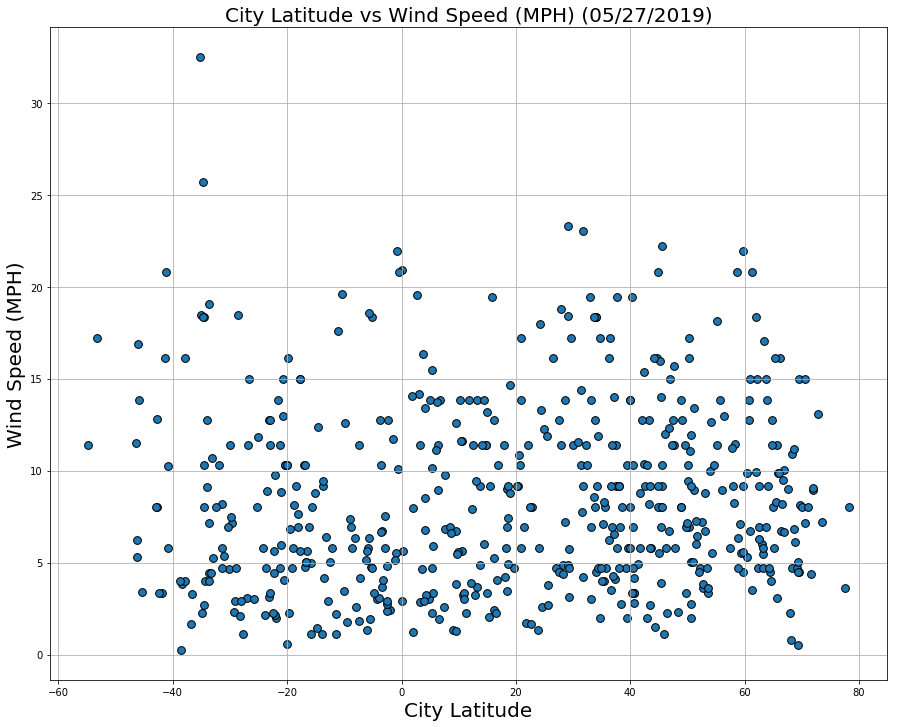

In [72]:
WeatherDataFrame.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', marker="o", s=60, color="#1f77b4", edgecolor='black', alpha=1, figsize=(15,12))
cur_date = pd.datetime.now().strftime("%m/%d/%Y")

plt.grid()
plt.title(F"City Latitude vs Wind Speed (MPH) ({cur_date})", fontsize=20)
plt.xlabel('City Latitude', fontsize=20)
plt.ylabel('Wind Speed (MPH)', fontsize=20)
plt.savefig('CityLat_Wind.png')
plt.show()